In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [51]:
df=pd.read_csv('google-data.csv')

In [52]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [54]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [55]:
df.Date.min(), df.Date.max()

('2013-01-02', '2017-12-29')

In [56]:
df_new=df[['Date','Close']]

In [57]:
df_new.head(5)

,Date,Close
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701


In [58]:
df_new.columns=['ds','y']

In [59]:
df_new.head(5)

,ds,y
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701


In [60]:
m=Prophet()
m.fit(df_new)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [61]:
future=m.make_future_dataframe(periods=100, freq='D')
prediction=m.predict(future)

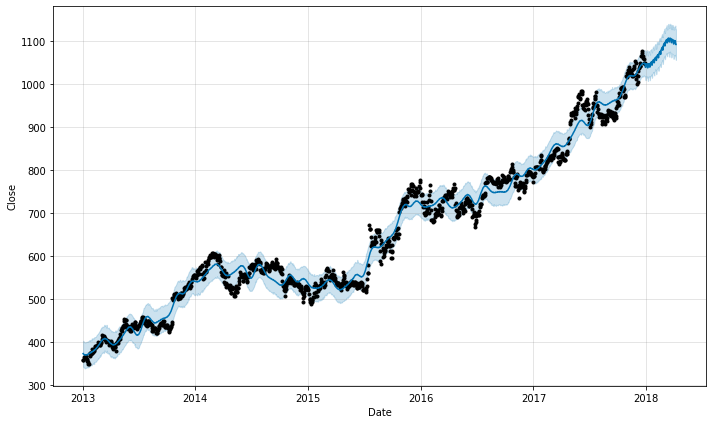

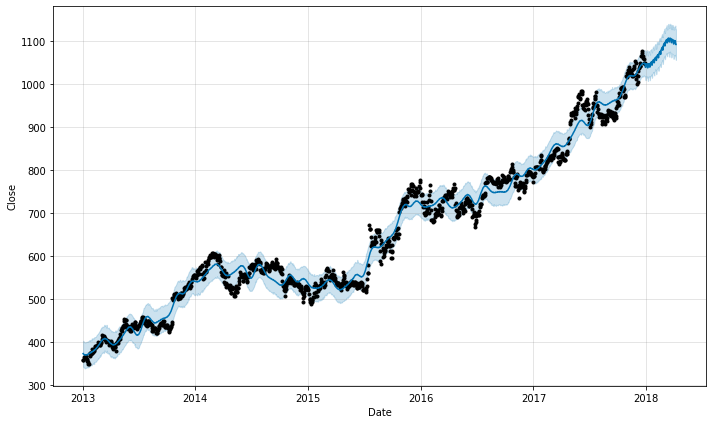

In [62]:
m.plot(prediction, xlabel='Date', ylabel='Close')

**Bayesian Optimization**

In [63]:
!pip install scikit-optimize

In [64]:
from fbprophet.diagnostics import cross_validation, performance_metrics

In [65]:
df_new.shape

(1259, 2)

In [66]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
    
df_p = performance_metrics(df_cv)

INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


In [67]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,5350.375943,73.146264,57.277768,0.087105,0.063639,0.301333
1,38 days,5517.841806,74.282177,58.341806,0.088622,0.066889,0.296000
2,39 days,5711.610200,75.575196,59.653983,0.090703,0.067063,0.290667
3,40 days,5929.520701,77.003381,60.913422,0.092748,0.075581,0.288000
4,41 days,6191.361434,78.685205,62.891378,0.095812,0.085172,0.280000
...,...,...,...,...,...,...,...
324,361 days,89721.464235,299.535414,276.368357,0.344358,0.323800,0.322667
325,362 days,89665.093501,299.441302,276.091052,0.343532,0.323800,0.320000
326,363 days,89008.907090,298.343606,274.884559,0.342461,0.319815,0.328000
327,364 days,88984.854769,298.303293,275.118068,0.343629,0.319815,0.336000


In [68]:
from skopt.space import Real

In [69]:
bounds = [Real(0.001, 0.5,name = 'changepoint_prior_scale'),
          Real(0.01, 10, name = 'seasonality_prior_scale'),
          Real(0.8, 0.95, name = 'changepoint_range'),
          Real(0.01, 10, name = 'holidays_prior_scale')]

In [70]:
from skopt.utils import use_named_args

@use_named_args(bounds)
def objective(**params):
    '''Train a prophet model and return the rmse'''
    # modeling
    m = Prophet(**params)
    
    m.fit(df_new) 
    df_cv = cross_validation(m, 
                             initial='730 days', period='180 days', horizon = '365 days')
    
    df_p = performance_metrics(df_cv)
  
    return df_p['rmse'].values[0]

In [71]:
from skopt import gp_minimize

In [72]:
res_gp = gp_minimize(objective, bounds, n_calls=20, random_state=0)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2015-01-09 00:00:00 and 2016-12-29 00:00:00


In [73]:
best_params = {'changepoint_prior_scale':res_gp.x[0],
               'seasonality_prior_scale' :res_gp.x[1],
               'changepoint_range':res_gp.x[2],
               'holidays_prior_scale':res_gp.x[3]}

In [74]:
best_params

{'changepoint_prior_scale': 0.5,
 'changepoint_range': 0.8766078430100696,
 'holidays_prior_scale': 0.01,
 'seasonality_prior_scale': 10.0}

In [75]:
m = Prophet(**best_params)

m.fit(df_new)
future_data = m.make_future_dataframe(periods=100, freq='D')
preds = m.predict(future_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


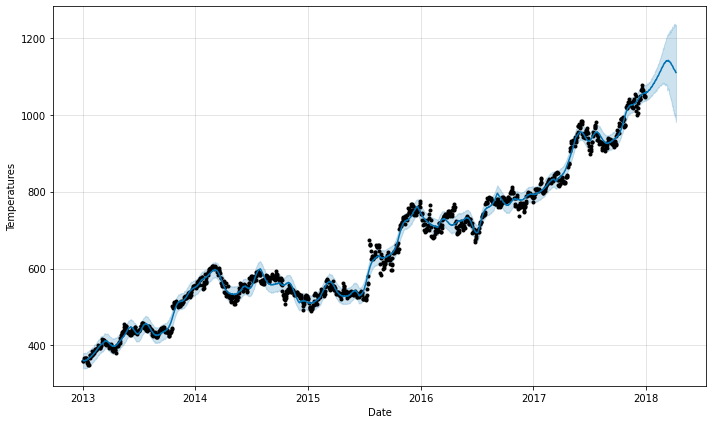

<Figure size 1296x432 with 0 Axes>

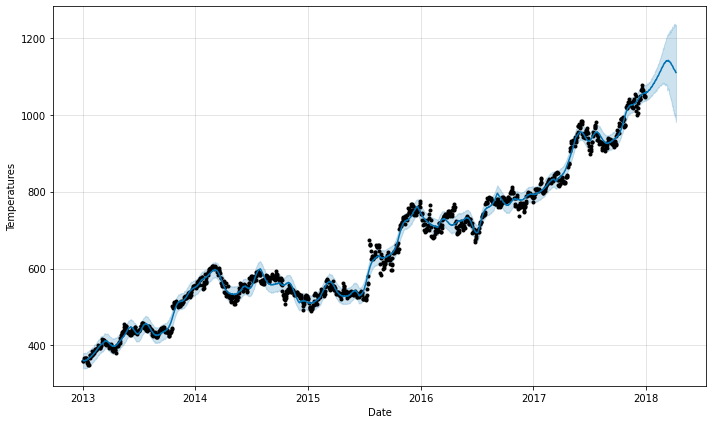

In [76]:
plt.figure(figsize=(18, 6))
m.plot(preds, xlabel = 'Date', ylabel = 'Temperatures')